In [34]:
import random
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        # Initialize centroids randomly
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # Assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = np.copy(self.centroids)
            # Update centroids
            self.centroids = self.move_centroids(X, cluster_group)
            # Check for convergence
            if np.array_equal(old_centroids, self.centroids):
                break

        return cluster_group

    def assign_clusters(self, X):
        cluster_group = []

        for row in X:
            distances = [np.linalg.norm(row - centroid) for centroid in self.centroids]
            cluster_group.append(np.argmin(distances))

        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []

        for i in range(self.n_clusters):
            cluster_points = X[cluster_group == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                # If no points belong to the cluster, keep the centroid unchanged
                new_centroid = self.centroids[i]
            new_centroids.append(new_centroid)

        return np.array(new_centroids)

    def elbow_method(self, X, max_clusters=10):
        inertias = []
        for k in range(1, max_clusters+1):
            kmeans = KMeans(n_clusters=k, max_iter=self.max_iter)
            kmeans.fit_predict(X)
            inertias.append(kmeans.compute_inertia(X))

        # Plot the elbow curve
        plt.plot(range(1, max_clusters+1), inertias, marker='o')
        plt.title('Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.show()
    #Within cluster sum of squares // alternative of the np.linalg.norm()   is np.sqrt(np.dot(a-b,a-b)) i-> type of clusters 0,1,2,3 in my case
    def compute_inertia(self, X):
        cluster_group = self.assign_clusters(X)
        inertia = sum(np.linalg.norm(X[cluster_group == i] - self.centroids[i]) ** 2
                      for i in range(self.n_clusters))
        return inertia


In [40]:
a=[1,2]
b=[3,4]
np.linalg.norm(np.array(a)-np.array(b))

2.8284271247461903

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

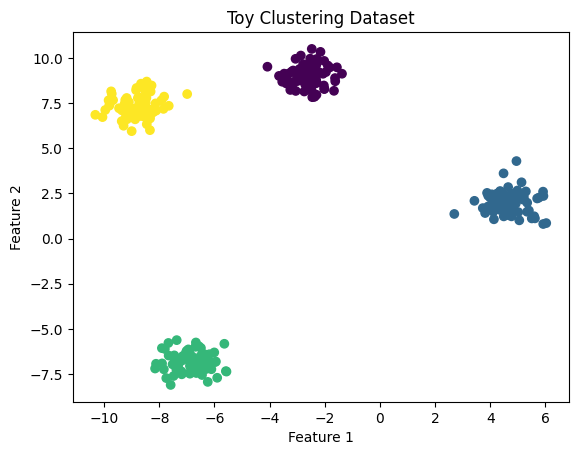

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Toy Clustering Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

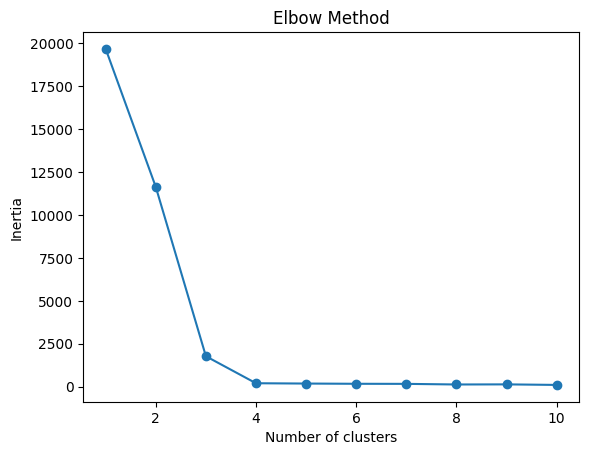

In [35]:
km=KMeans(n_clusters=4,max_iter=5000)
km.elbow_method(X)

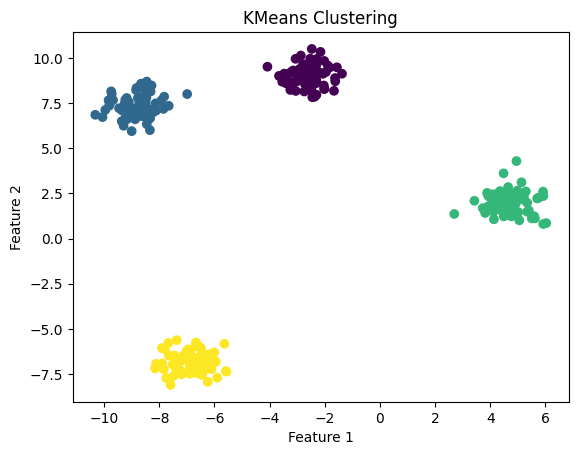

In [41]:
predictions=km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()